In [89]:
import numpy as np
import pandas as pd
import scipy as scp
import itertools as it
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [90]:
class sys_resolve_atoms:
    def __init__(self, n):
        """
        Inicializa o sistema com n massas.

        Args:
            n (int): O número de massas (e o tamanho da matriz).
        """
        if n < 2:
            raise ValueError("O número de massas (n) deve ser pelo menos 2.")
        self.n = n
        self.matrix = np.zeros((n, n), dtype=float)
        self._autovalores = None
        self._autovetores = None

    def create_matrix(self, m: list, k: list):
        """
        Gera a matriz dinâmica D com base nas massas (m) e nas constantes de mola (k).
        """

        if len(m) != self.n:
            raise ValueError(f"A lista de massas 'm' deve ter {self.n} elementos, mas tem {len(m)}.")
        if len(k) != self.n:
            raise ValueError(f"A lista de constantes 'k' deve ter {self.n} elementos, mas tem {len(k)}.")

        
        self.matrix = np.zeros((self.n, self.n), dtype=float)

        for i in range(self.n):
            for j in range(self.n):
                if i == j:
                    if i == 0:
                        self.matrix[i, j] = (k[0] + k[self.n - 1])/ m[i]
                    elif i == self.n - 1:
                        self.matrix[i, j] = (k[i - 1] + k[self.n - 1]) / m[i]
                    else:
                        self.matrix[i, j] = (k[i - 1] + k[i]) / m[i]
                elif abs(i - j) == 1:
                    k_index = min(i, j)
                    self.matrix[i, j] = -k[k_index] / m[i]
                elif (i == self.n-1 and j == 0) or (i == 0 and j == self.n-1):
                    self.matrix[i, j] = -k[self.n - 1] / m[i]
        
        return self.matrix

    def _calculate_system_values(self):
        """
        Método interno para calcular autovalores e autovetores
        """
        autovalores, autovetores = np.linalg.eig(self.matrix)
        
        sorted_indices = np.argsort(autovalores)
        self._autovalores = autovalores[sorted_indices]
        self._autovetores = autovetores[:, sorted_indices]

    def get_autovalores(self):
        """
        Calcula e retorna os autovalores (λ = ω²) da matriz dinâmica D.
        """
        self._calculate_system_values()
        return self._autovalores

    def get_autovetores(self):
        """
        Calcula e retorna os autovetores (modos normais de vibração) da matriz D.

        Returns:
            np.ndarray: Uma matriz onde cada coluna é um autovetor correspondente
                        a um autovalor (na mesma ordem retornada por get_autovalores).
        """
        self._calculate_system_values()
        return self._autovetores
    
    def get_frequencia_angular(self):
        self._calculate_system_values()
        autovalores_positivos = self._autovalores[self._autovalores >= 0]
        return np.sqrt(autovalores_positivos)


In [91]:
df = pd.DataFrame()

In [92]:

n = 2

massas = [1.0, 1.0]
ks = [1.0, 1.0]

# 1. Criar a instância do sistema
system = sys_resolve_atoms(n)

results = {}

massa = []
frequencia = []

for i in range(1, 11):
    massas[-1] = i

    results[f'm = {i}'] = {}

    print(f"\n*----------------------------------*\nM2 = {i}")


    # 2. Gerar a matriz dinâmica D
    results[f'm = {i}']['matriz'] = system.create_matrix(m=massas, k=ks)
    print("--- Matriz Dinâmica D ---")
    print(results[f'm = {i}']['matriz'])

    # 3. Calcular e imprimir os autovalores (ω²)
    # Os autovalores correspondem ao quadrado das frequências angulares de oscilação
    results[f'm = {i}']['autovalores'] = system.get_autovalores()
    print("\n--- Autovalores (λ = ω²) ---")
    print(results[f'm = {i}']['autovalores'])

    # 4. Calcular e imprimir os autovetores (Modos Normais)
    # Cada coluna da matriz de autovetores representa um modo normal de vibração
    results[f'm = {i}']['autovetores'] = system.get_autovetores()
    print("\n--- Autovetores (Modos Normais de Vibração) ---")
    print(results[f'm = {i}']['autovetores'])

    # 5. Calcular as frequências angulares (ω)
    # ω = sqrt(λ), mas apenas para autovalores positivos
    positive_values = [ j for j in results[f'm = {i}']['autovalores'].reshape(-1) if j>= 0 ]
    results[f'm = {i}']['frequencias_angulares'] = np.sqrt(positive_values)
    frequencia += list(np.sqrt(positive_values))
    massa += [i for k in np.sqrt(positive_values)]
    print("\n--- Frequências Angulares de Oscilação (ω) ---")
    print(results[f'm = {i}']['frequencias_angulares'])


*----------------------------------*
M2 = 1
--- Matriz Dinâmica D ---
[[ 2. -1.]
 [-1.  2.]]

--- Autovalores (λ = ω²) ---
[1. 3.]

--- Autovetores (Modos Normais de Vibração) ---
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

--- Frequências Angulares de Oscilação (ω) ---
[1.         1.73205081]

*----------------------------------*
M2 = 2
--- Matriz Dinâmica D ---
[[ 2.  -1. ]
 [-0.5  1. ]]

--- Autovalores (λ = ω²) ---
[0.6339746 2.3660254]

--- Autovetores (Modos Normais de Vibração) ---
[[ 0.59069049  0.9390708 ]
 [ 0.80689822 -0.34372377]]

--- Frequências Angulares de Oscilação (ω) ---
[0.79622522 1.538189  ]

*----------------------------------*
M2 = 3
--- Matriz Dinâmica D ---
[[ 2.         -1.        ]
 [-0.33333333  0.66666667]]

--- Autovalores (λ = ω²) ---
[0.45141623 2.21525044]

--- Autovetores (Modos Normais de Vibração) ---
[[ 0.54247681  0.97760877]
 [ 0.84007078 -0.21043072]]

--- Frequências Angulares de Oscilação (ω) ---
[0.67187516 1.48837174]

*--------

In [93]:
df['m'] = massa
df['w'] = frequencia
df['n'] = 2

In [94]:
n = 3
dt = pd.DataFrame()

massas = [1.0, 1.0, 1.0]
ks = [1.0, 1.0, 1.0]

# 1. Criar a instância do sistema
system = sys_resolve_atoms(n)

results2 = {}

massa2 = []
frequencia2 = []

for  t in [1,2,3,4,5,6,7,8,9,10,11,12,13]:

    if t == 1:
        i = "Todas Iguais"
        massas = [1.0, 1.0, 1.0]
    elif t == 2:
        i = "Uma Diferente"
        massas = [1.0, 2.0, 1.0]
    else:
        i = "Todas Diferentes"
        massas = [1.0, t-1, t]
        

    results2[f'{i}'] = {}

    print(f"\n*----------------------------------*\n{i}")


    # 2. Gerar a matriz dinâmica D
    results2[f'{i}']['matriz'] = system.create_matrix(m=massas, k=ks)
    print("--- Matriz Dinâmica D ---")
    print(results2[f'{i}']['matriz'])

    # 3. Calcular e imprimir os autovalores (ω²)
    # Os autovalores correspondem ao quadrado das frequências angulares de oscilação
    results2[f'{i}']['autovalores'] = system.get_autovalores()
    print("\n--- Autovalores (λ = ω²) ---")
    print(results2[f'{i}']['autovalores'])

    # 4. Calcular e imprimir os autovetores (Modos Normais)
    # Cada coluna da matriz de autovetores representa um modo normal de vibração
    results2[f'{i}']['autovetores'] = system.get_autovetores()
    print("\n--- Autovetores (Modos Normais de Vibração) ---")
    print(results2[f'{i}']['autovetores'])

    # 5. Calcular as frequências angulares (ω)
    # ω = sqrt(λ), mas apenas para autovalores positivos
    positive_values = [ j for j in results2[f'{i}']['autovalores'].reshape(-1) if j>= 0 ]
    results2[f'{i}']['frequencias_angulares'] = np.sqrt(positive_values)
    frequencia2 += list(np.sqrt(positive_values))
    massa2 += [i for k in np.sqrt(positive_values)]
    print("\n--- Frequências Angulares de Oscilação (ω) ---")
    print(results2[f'{i}']['frequencias_angulares'])

dt['massas'] = massa2
dt['w'] = frequencia2
dt['n'] = 3


*----------------------------------*
Todas Iguais
--- Matriz Dinâmica D ---
[[ 2. -1. -1.]
 [-1.  2. -1.]
 [-1. -1.  2.]]

--- Autovalores (λ = ω²) ---
[-4.23796137e-16  3.00000000e+00  3.00000000e+00]

--- Autovetores (Modos Normais de Vibração) ---
[[-0.57735027  0.81649658  0.25359481]
 [-0.57735027 -0.40824829 -0.79893374]
 [-0.57735027 -0.40824829  0.54533893]]

--- Frequências Angulares de Oscilação (ω) ---
[1.73205081 1.73205081]

*----------------------------------*
Uma Diferente
--- Matriz Dinâmica D ---
[[ 2.  -1.  -1. ]
 [-0.5  1.  -0.5]
 [-1.  -1.   2. ]]

--- Autovalores (λ = ω²) ---
[0. 2. 3.]

--- Autovetores (Modos Normais de Vibração) ---
[[ 5.77350269e-01  5.77350269e-01  7.07106781e-01]
 [ 5.77350269e-01 -5.77350269e-01  3.83804137e-17]
 [ 5.77350269e-01  5.77350269e-01 -7.07106781e-01]]

--- Frequências Angulares de Oscilação (ω) ---
[0.         1.41421356 1.73205081]

*----------------------------------*
Todas Diferentes
--- Matriz Dinâmica D ---
[[ 2.         -1.

In [95]:
n = 3
dw = pd.DataFrame()

massas = [1.0, 1.0, 1.0]
ks = [1.0, 1.0, 1.0]

# 1. Criar a instância do sistema
system = sys_resolve_atoms(n)

results3 = {}

massa3 = []
frequencia3 = []

for i in ["Todas Iguais", "Uma Diferente", "Todas Diferentes"]:

    if i == "Todas Iguais":
        ks = [1.0, 1.0, 1.0]
    elif i == "Uma Diferente":
        ks = [1.0, 2.0, 1.0]
    elif i == "Todas Diferentes":
        ks = [1.0, 2.0, 3.0]
        

    results3[f'{i}'] = {}

    print(f"\n*----------------------------------*\n{i}")


    # 2. Gerar a matriz dinâmica D
    results3[f'{i}']['matriz'] = system.create_matrix(m=massas, k=ks)
    print("--- Matriz Dinâmica D ---")
    print(results3[f'{i}']['matriz'])

    # 3. Calcular e imprimir os autovalores (ω²)
    # Os autovalores correspondem ao quadrado das frequências angulares de oscilação
    results3[f'{i}']['autovalores'] = system.get_autovalores()
    print("\n--- Autovalores (λ = ω²) ---")
    print(results3[f'{i}']['autovalores'])

    # 4. Calcular e imprimir os autovetores (Modos Normais)
    # Cada coluna da matriz de autovetores representa um modo normal de vibração
    results3[f'{i}']['autovetores'] = system.get_autovetores()
    print("\n--- Autovetores (Modos Normais de Vibração) ---")
    print(results3[f'{i}']['autovetores'])

    # 5. Calcular as frequências angulares (ω)
    # ω = sqrt(λ), mas apenas para autovalores positivos
    positive_values = [ j for j in results3[f'{i}']['autovalores'].reshape(-1) if j>= 0 ]
    results3[f'{i}']['frequencias_angulares'] = np.sqrt(positive_values)
    frequencia3 += list(np.sqrt(positive_values))
    massa3 += [i for k in np.sqrt(positive_values)]
    print("\n--- Frequências Angulares de Oscilação (ω) ---")
    print(results3[f'{i}']['frequencias_angulares'])

dw['massas'] = massa3
dw['w'] = frequencia3
dw['n'] = 3


*----------------------------------*
Todas Iguais
--- Matriz Dinâmica D ---
[[ 2. -1. -1.]
 [-1.  2. -1.]
 [-1. -1.  2.]]

--- Autovalores (λ = ω²) ---
[-4.23796137e-16  3.00000000e+00  3.00000000e+00]

--- Autovetores (Modos Normais de Vibração) ---
[[-0.57735027  0.81649658  0.25359481]
 [-0.57735027 -0.40824829 -0.79893374]
 [-0.57735027 -0.40824829  0.54533893]]

--- Frequências Angulares de Oscilação (ω) ---
[1.73205081 1.73205081]

*----------------------------------*
Uma Diferente
--- Matriz Dinâmica D ---
[[ 2. -1. -1.]
 [-1.  3. -2.]
 [-1. -2.  3.]]

--- Autovalores (λ = ω²) ---
[-4.88831496e-16  3.00000000e+00  5.00000000e+00]

--- Autovetores (Modos Normais de Vibração) ---
[[-5.77350269e-01  8.16496581e-01 -1.69434021e-16]
 [-5.77350269e-01 -4.08248290e-01 -7.07106781e-01]
 [-5.77350269e-01 -4.08248290e-01  7.07106781e-01]]

--- Frequências Angulares de Oscilação (ω) ---
[1.73205081 2.23606798]

*----------------------------------*
Todas Diferentes
--- Matriz Dinâmica D --

In [96]:
def plot_freq_vs_massa(n, massas, ks, indice_variacao_massa, valor_variacao_massa, titulo):
    frequencias_data = []
    
    for m_val in valor_variacao_massa:
        massas_atuais = list(massas) # Cria uma cópia para não modificar a original
        massas_atuais[indice_variacao_massa] = m_val
        
        system = sys_resolve_atoms(n)
        system.create_matrix(m=massas_atuais, k=ks)
        
        # Obtém as frequências angulares (ω)
        frquencias_angulares = system.get_frequencia_angular()
        
        for i, freq in enumerate(frquencias_angulares):
            frequencias_data.append({
                f'Massa {indice_variacao_massa+1}': m_val,
                'Frequência Angular (ω)': freq,
                'Modo': f'Modo {i+1}'
            })
            
    df_freq = pd.DataFrame(frequencias_data)
    
    plt.figure()
    sns.lineplot(data=df_freq, x=f'Massa {indice_variacao_massa+1}', y='Frequência Angular (ω)', hue='Modo', marker='o')
    plt.title(titulo)
    plt.xlabel(f'Valor da Massa {indice_variacao_massa+1}')
    plt.ylabel('Frequência Angular (ω)')
    plt.legend(title='Modo de Vibração')
    plt.tight_layout()
    plt.savefig(f'frequencias_vs_massa_{n}_atoms.png')

In [97]:
def plot_modos_normais(n, massas, ks, titulo, filename):
    system = sys_resolve_atoms(n)
    system.create_matrix(m=massas, k=ks)
    
    autovetores = system.get_autovetores()
    frquencias_angulares = system.get_frequencia_angular()
    
    plt.figure(figsize=(12, 4 * n))
    
    for i in range(n):
        
        mode = autovetores[:, i]
        try :
            freq = frquencias_angulares[i]
        except IndexError:
            pass
        
        plt.subplot(n, 1, i + 1)
        plt.plot(range(1, n + 1), mode, 'o-')
        plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
        plt.title(f'Modo Normal {i+1} (ω = {freq:.2f} rad/s)')
        plt.xlabel('Átomo')
        plt.ylabel('Amplitude Relativa')
        plt.xticks(range(1, n + 1))
        plt.grid(True)
        
    plt.tight_layout()
    plt.savefig(filename)
    # plt.close()

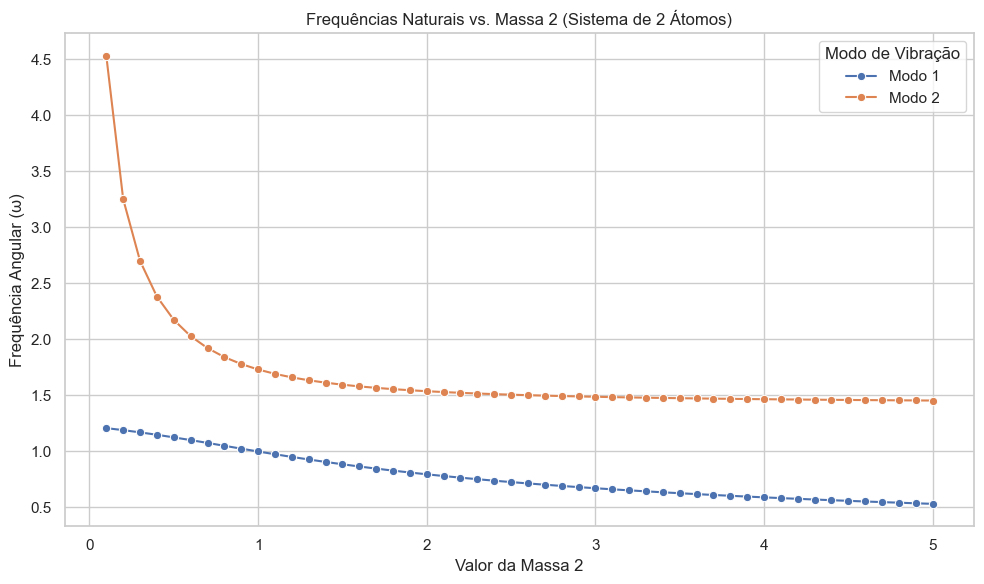

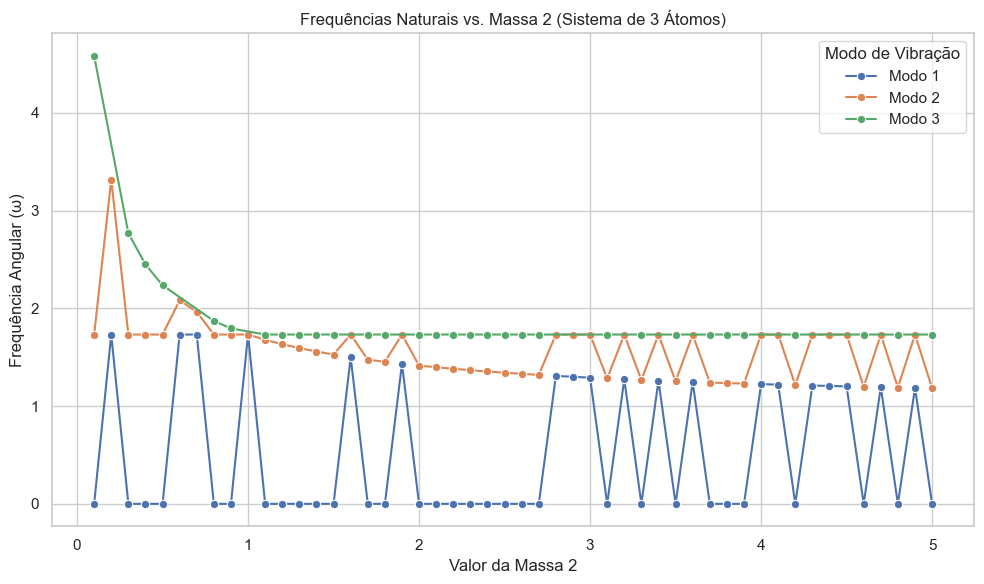

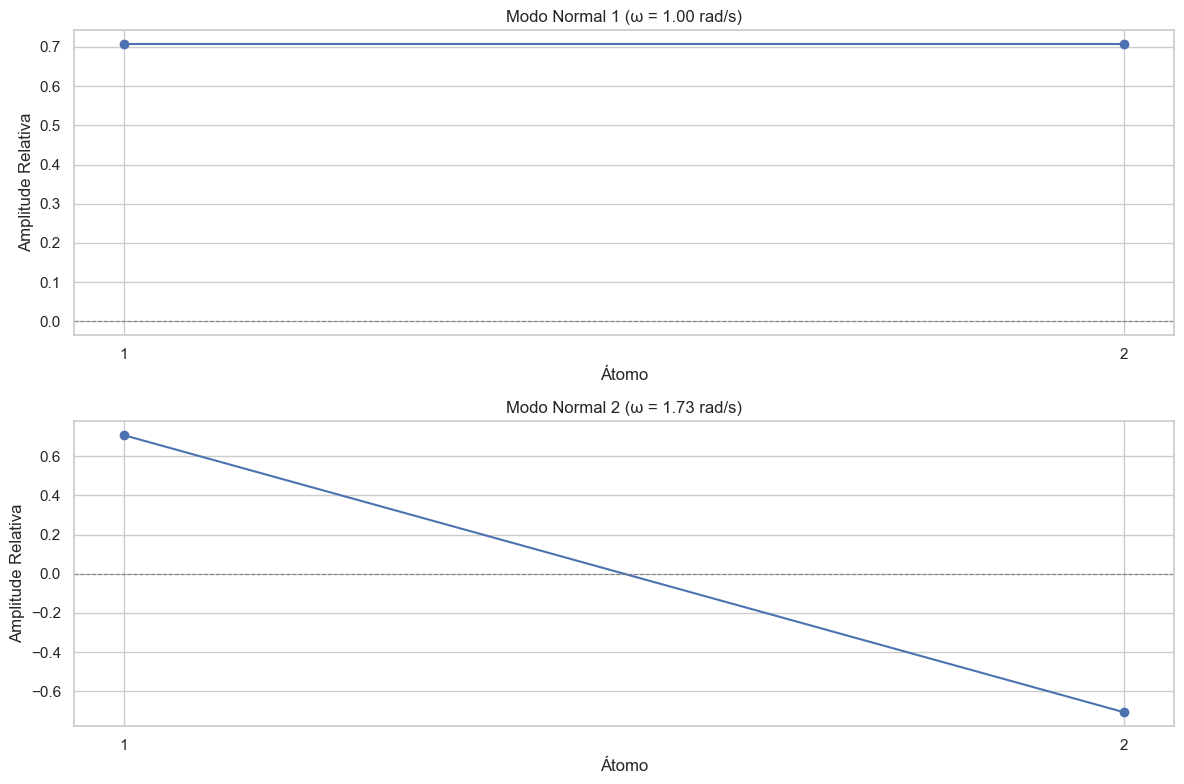

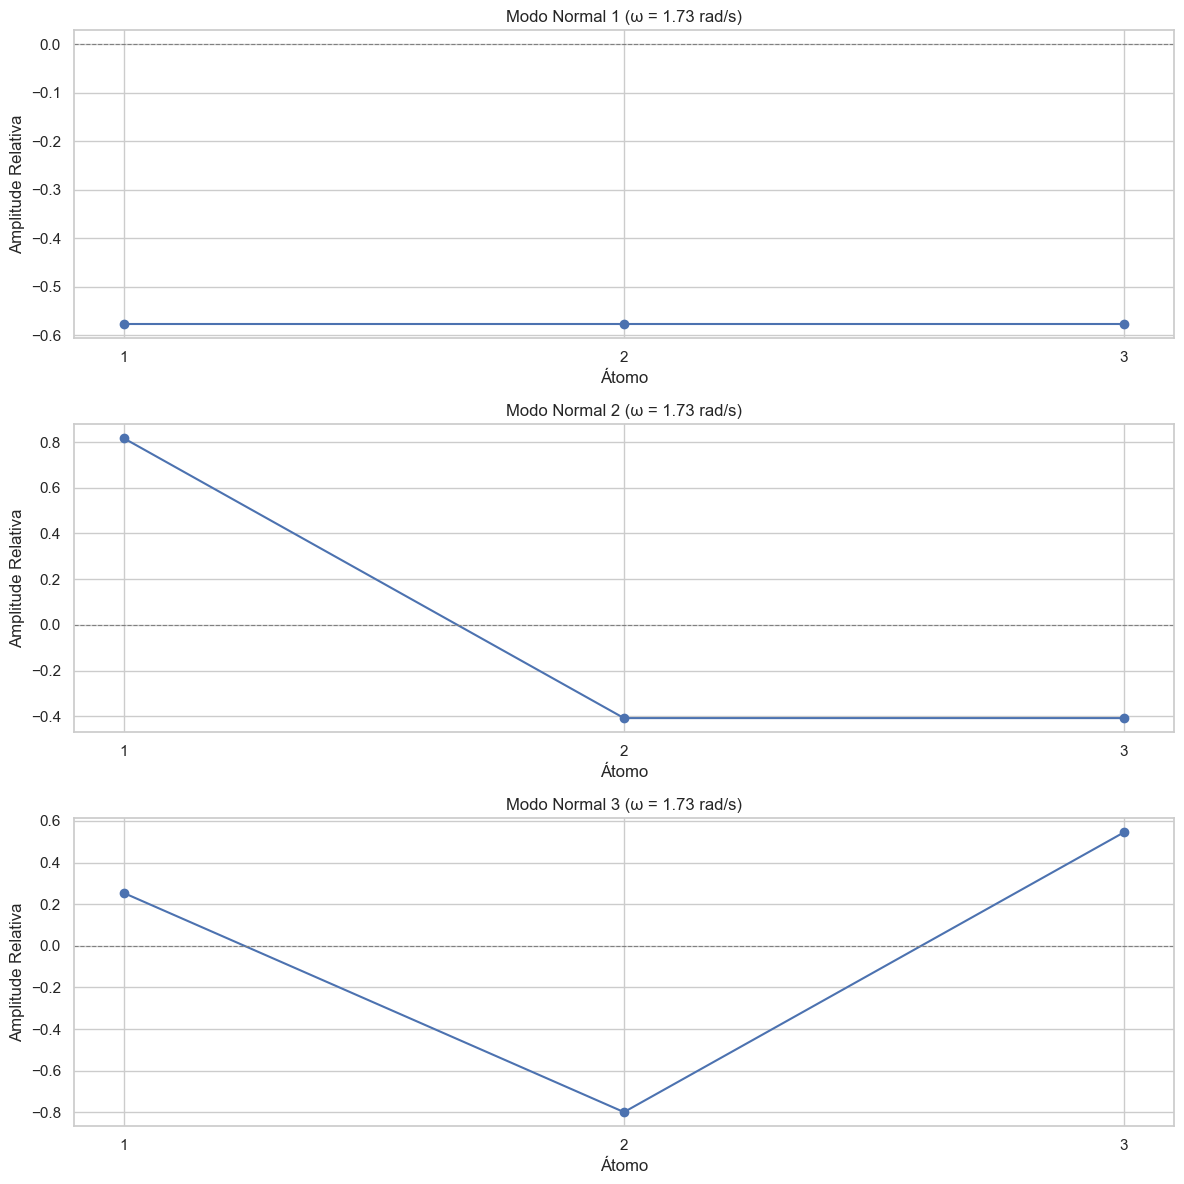

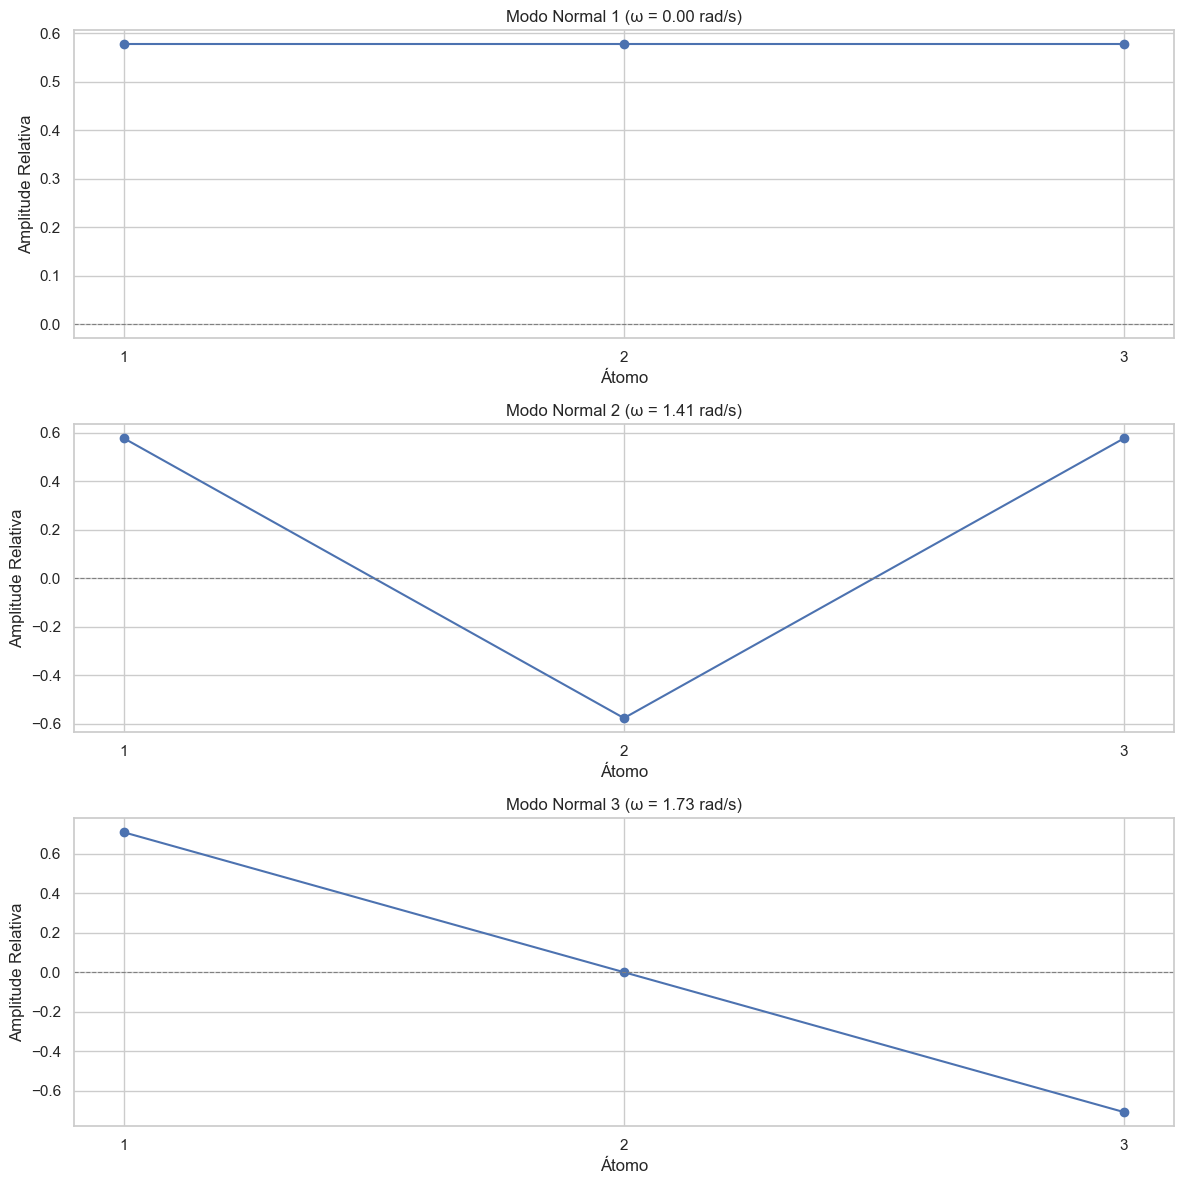

In [98]:
# Variação para 2 átomos (variando m2)
n_2 = 2
massas_2 = [1.0, 1.0] # m1, m2
ks_2 = [1.0, 1.0] # k12
valor_variacao_massa_2 = np.linspace(0.1, 5.0, 50) # Varia m2 de 0.1 a 5.0
plot_freq_vs_massa(n_2, massas_2, ks_2, 1, valor_variacao_massa_2, 
                         'Frequências Naturais vs. Massa 2 (Sistema de 2 Átomos)')

# Variação para 3 átomos (variando m2)
n_3 = 3
massas_3 = [1.0, 1.0, 1.0] # m1, m2, m3
ks_3 = [1.0, 1.0, 1.0] # k12, k23
valor_variacao_massa_3 = np.linspace(0.1, 5.0, 50) # Varia m2 de 0.1 a 5.0
plot_freq_vs_massa(n_3, massas_3, ks_3, 1, valor_variacao_massa_3, 
                         'Frequências Naturais vs. Massa 2 (Sistema de 3 Átomos)')

# --- 2. Gráficos dos modos normais para cada configuração ---



# Modos normais para 2 átomos
plot_modos_normais(2, [1.0, 1.0], [1.0, 1.0], 'Modos Normais (2 Átomos)', 'modos_normais_2_atoms.png')

# Modos normais para 3 átomos (massas iguais)
plot_modos_normais(3, [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], 'Modos Normais (3 Átomos - Massas Iguais)', 'modos_normais_3_atoms_equal.png')

# Modos normais para 3 átomos (uma massa diferente)
plot_modos_normais(3, [1.0, 2.0, 1.0], [1.0, 1.0, 1.0], 'Modos Normais (3 Átomos - Massa Central Maior)', 'modos_normais_3_atoms_middle_heavy.png')

# Coleta de dados para o relatório
report_data = {}

# 2 Átomos
system_2_report = sys_resolve_atoms(2)
system_2_report.create_matrix(m=[1.0, 1.0], k=[1.0, 1.0])
report_data['2_atoms_equal_massa_freq'] = system_2_report.get_frequencia_angular()
report_data['2_atoms_equal_massa_modos'] = system_2_report.get_autovetores()

# 3 Átomos (massas iguais)
system_3_equal_report = sys_resolve_atoms(3)
system_3_equal_report.create_matrix(m=[1.0, 1.0, 1.0], k=[1.0, 1.0, 1.0])
report_data['3_atoms_equal_massa_freq'] = system_3_equal_report.get_frequencia_angular()
report_data['3_atoms_equal_massa_modos'] = system_3_equal_report.get_autovetores()

# 3 Átomos (massa central maior)
system_3_middle_heavy_report = sys_resolve_atoms(3)
system_3_middle_heavy_report.create_matrix(m=[1.0, 2.0, 1.0], k=[1.0, 1.0, 1.0])
report_data['3_atoms_middle_heavy_freq'] = system_3_middle_heavy_report.get_frequencia_angular()
report_data['3_atoms_middle_heavy_modos'] = system_3_middle_heavy_report.get_autovetores()

# Salvar dados para uso no relatório (opcional, pode ser processado diretamente)
import json
with open('info.json', 'w') as f:
    json.dump({
        k: (v.tolist() if isinstance(v, np.ndarray) else v)
        for k, v in report_data.items()
    }, f, indent=4)


